In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import joblib

In [2]:
data = pd.read_csv('Loan_Default.csv')

In [3]:
data.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data.tail(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [5]:
data.shape

(148670, 34)

<Axes: xlabel='Status', ylabel='count'>

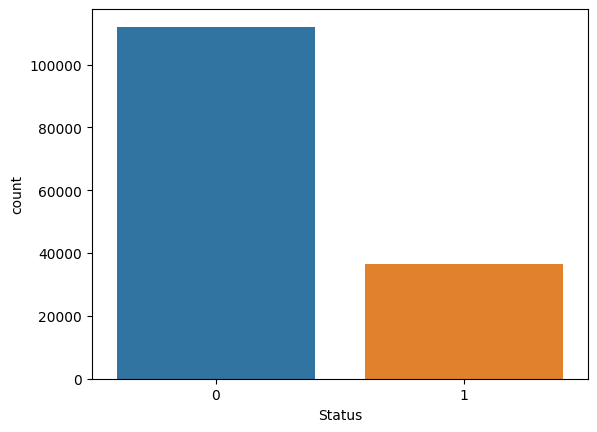

In [6]:
sns.countplot(x='Status', data = data)

In [7]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

/var/folders/5t/_qnh6zv500z2g2x1vk2ypyvr0000gn/T/ipykernel_8268/2695943163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


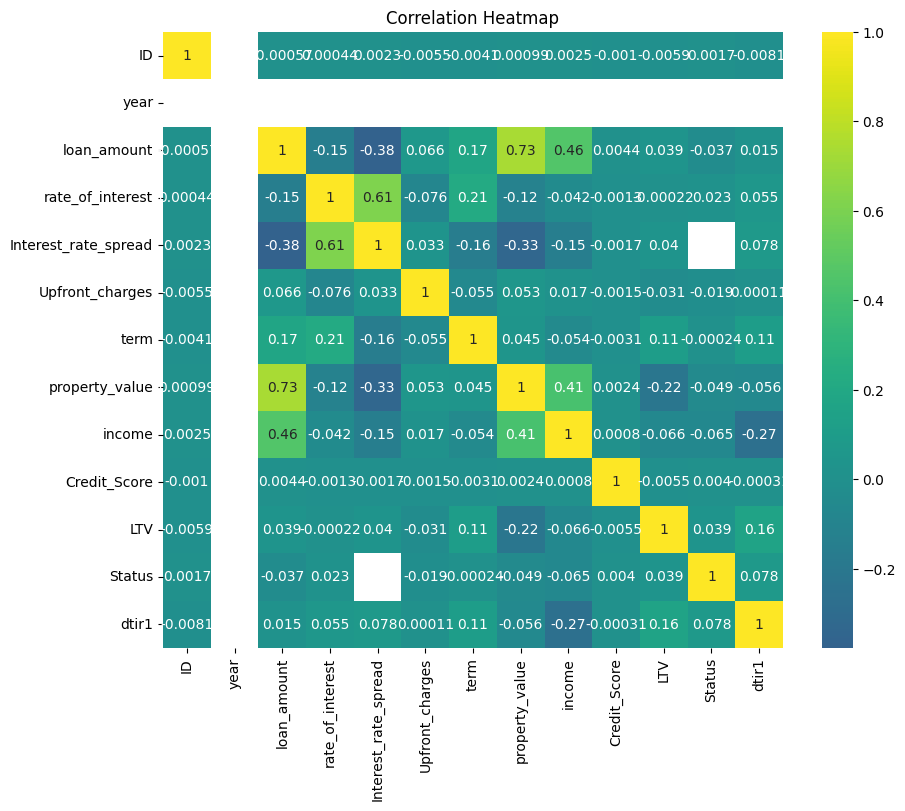

In [8]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap')
plt.show()

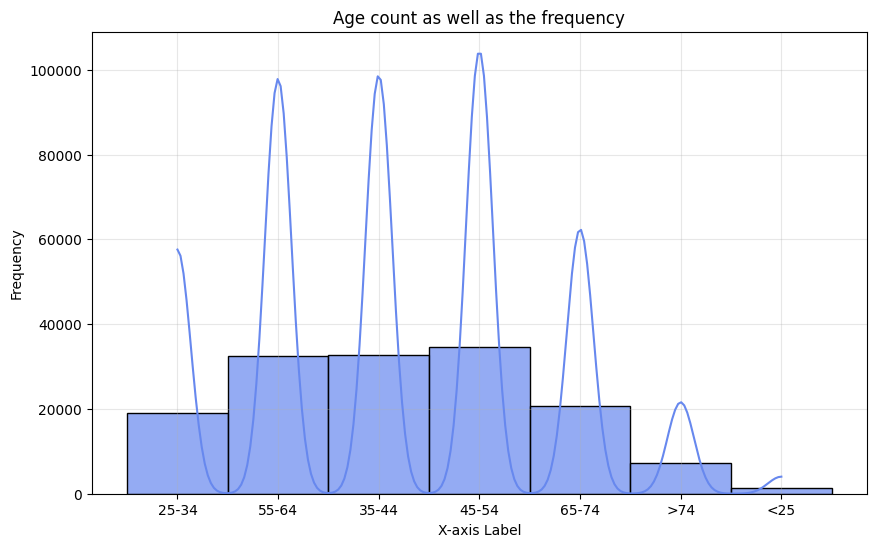

In [9]:
# Choose a color palette and adjust transparency
sns.set_palette("coolwarm")
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, alpha=0.7)  

# Add grid lines
plt.grid(True, alpha=0.3)

# Customize labels and title
plt.title('Age count as well as the frequency')
plt.xlabel('X-axis Label')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0, 0.5, 'Status')

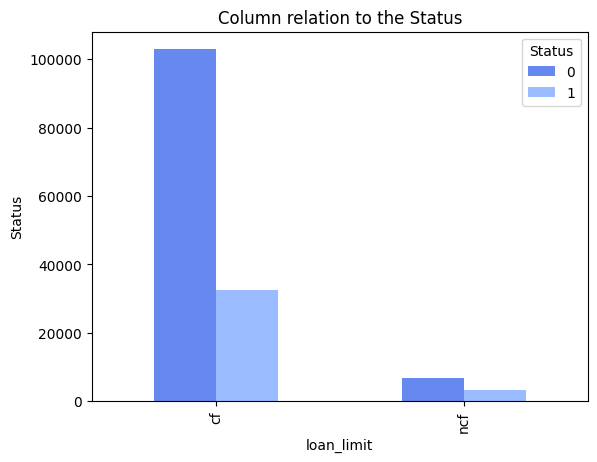

In [10]:
pd.crosstab(data.loan_limit,data.Status).plot(kind='bar')
plt.title('Column relation to the Status')
plt.xlabel('loan_limit')
plt.ylabel('Status')

Text(0, 0.5, 'Status')

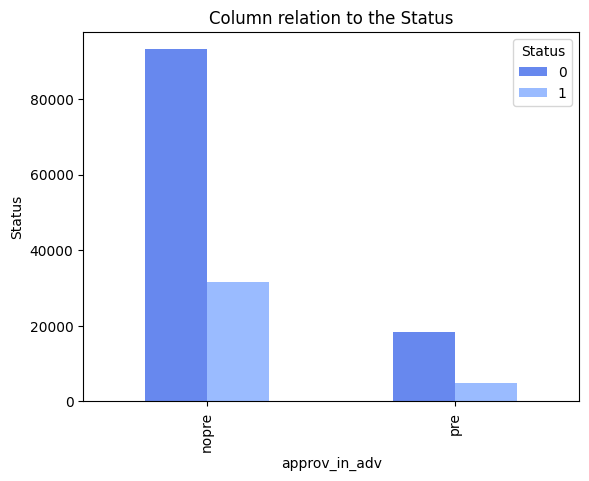

In [11]:
pd.crosstab(data.approv_in_adv,data.Status).plot(kind='bar')
plt.title('Column relation to the Status')
plt.xlabel('approv_in_adv')
plt.ylabel('Status')

Text(0, 0.5, 'Status')

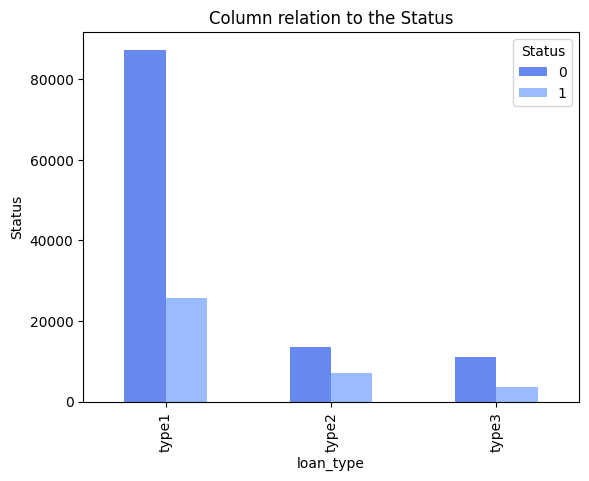

In [12]:
pd.crosstab(data.loan_type,data.Status).plot(kind='bar')
plt.title('Column relation to the Status')
plt.xlabel('loan_type')
plt.ylabel('Status')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


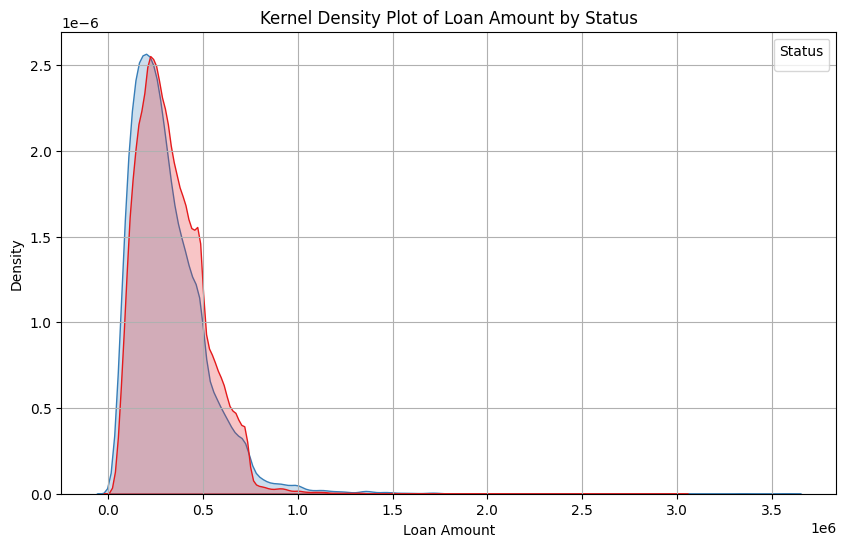

In [13]:
# Create a Kernel Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='loan_amount', hue='Status', fill=True, common_norm=False, palette='Set1')
plt.title('Kernel Density Plot of Loan Amount by Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title='Status')
plt.grid(True)
plt.show()

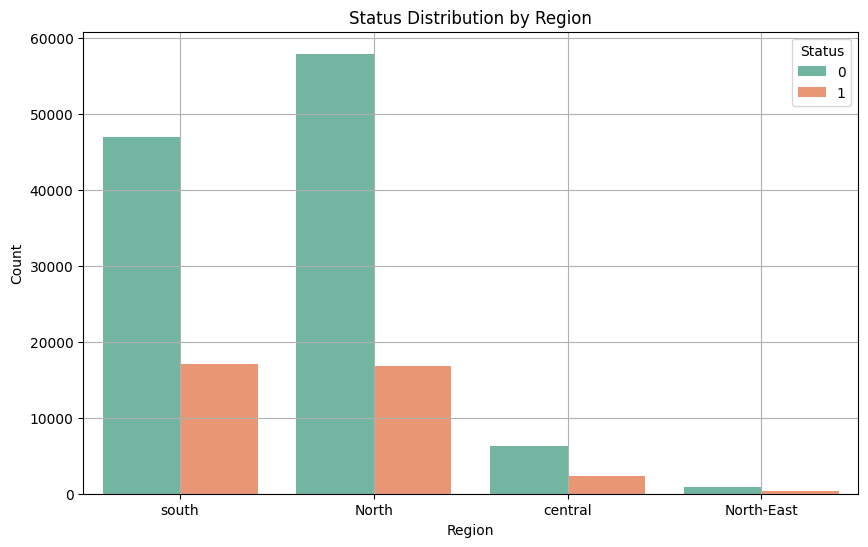

In [14]:
# Create a count plot to visualize 'Status' by 'Region'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', hue='Status', palette='Set2')
plt.title('Status Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Status')
plt.grid(True)
plt.show()

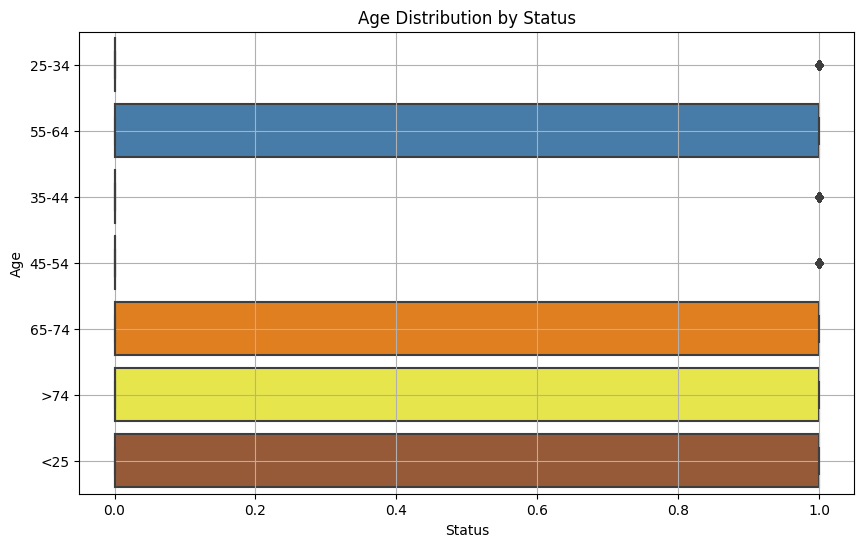

In [15]:
# Create a box plot or violin plot to visualize 'Status' by 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='age', palette='Set1')
plt.title('Age Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [16]:
column_list = data.columns
for column_name in column_list:
    print(data[column_name].unique())


[ 24890  24891  24892 ... 173557 173558 173559]
[2019]
['cf' nan 'ncf']
['Sex Not Available' 'Male' 'Joint' 'Female']
['nopre' 'pre' nan]
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2' nan]
['l1' 'l2']
['nopc' 'opc']
['nob/c' 'b/c']
[ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176500 1376500  566500  686500
  556500  676500  366500  276500  716500   66500  616500   96500  826500
   26500  666500  546500  986500  526500 1226500  726500 1486500 1416500
  536500  796500  516500   46500  876500  576500  626500 1506500  886500
  816500  646500  776500  746500  736500  896500  836500  806500 1386500
  976500  926500  786500  766500 1176

In [17]:
data.dtypes


ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [18]:
obj=[]
for i in data.columns:
    if data[i].dtype=='object':
        obj.append(i)
obj

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [19]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [20]:
for i in range(len(obj)):
    print(obj[i],data[obj[i]].unique())

loan_limit ['cf' nan 'ncf']
Gender ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv ['nopre' 'pre' nan]
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
business_or_commercial ['nob/c' 'b/c']
Neg_ammortization ['not_neg' 'neg_amm' nan]
interest_only ['not_int' 'int_only']
lump_sum_payment ['not_lpsm' 'lpsm']
construction_type ['sb' 'mh']
occupancy_type ['pr' 'sr' 'ir']
Secured_by ['home' 'land']
total_units ['1U' '2U' '3U' '4U']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ['CIB' 'EXP']
age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application ['to_inst' 'not_inst' nan]
Region ['south' 'North' 'central' 'North-East']
Security_Type ['direct' 'Indriect']


In [21]:
for i in obj:
    print(i,'-',data[i].isnull().sum())


loan_limit - 3344
Gender - 0
approv_in_adv - 908
loan_type - 0
loan_purpose - 134
Credit_Worthiness - 0
open_credit - 0
business_or_commercial - 0
Neg_ammortization - 121
interest_only - 0
lump_sum_payment - 0
construction_type - 0
occupancy_type - 0
Secured_by - 0
total_units - 0
credit_type - 0
co-applicant_credit_type - 0
age - 200
submission_of_application - 200
Region - 0
Security_Type - 0


In [22]:
data['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [23]:
for i in range(len(obj)):
    print(obj[i],data[obj[i]].unique())

loan_limit ['cf' nan 'ncf']
Gender ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv ['nopre' 'pre' nan]
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
business_or_commercial ['nob/c' 'b/c']
Neg_ammortization ['not_neg' 'neg_amm' nan]
interest_only ['not_int' 'int_only']
lump_sum_payment ['not_lpsm' 'lpsm']
construction_type ['sb' 'mh']
occupancy_type ['pr' 'sr' 'ir']
Secured_by ['home' 'land']
total_units ['1U' '2U' '3U' '4U']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ['CIB' 'EXP']
age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application ['to_inst' 'not_inst' nan]
Region ['south' 'North' 'central' 'North-East']
Security_Type ['direct' 'Indriect']


In [24]:
data['age'] = data['age'].replace({
    '35-44': 39.5,  # Mean age of 35-44 range
    '25-34': 29.5,  # Mean age of 25-34 range
    '55-64': 59.5,  # Mean age of 55-64 range
    '45-54': 49.5,  # Mean age of 45-54 range
    '65-74': 69.5,  # Mean age of 65-74 range
    '>74': 80,     # Assuming mean age of >74 range as 80
    '<25': 20      # Assuming mean age of <25 range as 20
})

In [25]:
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,29.5,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,59.5,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,39.5,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,49.5,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,29.5,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,59.5,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,29.5,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,49.5,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,59.5,to_inst,70.683453,North,direct,0,29.0


In [26]:
data = data.drop(['ID','year','Gender','rate_of_interest','Interest_rate_spread','property_value','Upfront_charges','LTV','dtir1'],axis=1)

In [27]:
data.head()

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,cf,nopre,type1,p1,l1,nopc,nob/c,116500,360.0,not_neg,...,1U,1740.0,EXP,758,CIB,29.5,to_inst,south,direct,1
1,cf,nopre,type2,p1,l1,nopc,b/c,206500,360.0,not_neg,...,1U,4980.0,EQUI,552,EXP,59.5,to_inst,North,direct,1
2,cf,pre,type1,p1,l1,nopc,nob/c,406500,360.0,neg_amm,...,1U,9480.0,EXP,834,CIB,39.5,to_inst,south,direct,0
3,cf,nopre,type1,p4,l1,nopc,nob/c,456500,360.0,not_neg,...,1U,11880.0,EXP,587,CIB,49.5,not_inst,North,direct,0
4,cf,pre,type1,p1,l1,nopc,nob/c,696500,360.0,not_neg,...,1U,10440.0,CRIF,602,EXP,29.5,not_inst,North,direct,0


In [28]:
data.isnull().sum()

loan_limit                   3344
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
term                           41
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
Status                          0
dtype: int64

In [29]:
data = data.dropna()
data.isnull().sum()

loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: int64

In [30]:
data['Status'].value_counts()

0    100881
1     34227
Name: Status, dtype: int64

In [31]:
obj=[]
for i in data.columns:
    if data[i].dtype=='object':
        obj.append(i)
obj

['loan_limit',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'submission_of_application',
 'Region',
 'Security_Type']

In [32]:
data

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,cf,nopre,type1,p1,l1,nopc,nob/c,116500,360.0,not_neg,...,1U,1740.0,EXP,758,CIB,29.5,to_inst,south,direct,1
1,cf,nopre,type2,p1,l1,nopc,b/c,206500,360.0,not_neg,...,1U,4980.0,EQUI,552,EXP,59.5,to_inst,North,direct,1
2,cf,pre,type1,p1,l1,nopc,nob/c,406500,360.0,neg_amm,...,1U,9480.0,EXP,834,CIB,39.5,to_inst,south,direct,0
3,cf,nopre,type1,p4,l1,nopc,nob/c,456500,360.0,not_neg,...,1U,11880.0,EXP,587,CIB,49.5,not_inst,North,direct,0
4,cf,pre,type1,p1,l1,nopc,nob/c,696500,360.0,not_neg,...,1U,10440.0,CRIF,602,EXP,29.5,not_inst,North,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,nopre,type1,p3,l1,nopc,nob/c,436500,180.0,not_neg,...,1U,7860.0,CIB,659,EXP,59.5,to_inst,south,direct,0
148666,cf,nopre,type1,p1,l1,nopc,nob/c,586500,360.0,not_neg,...,4U,7140.0,CIB,569,CIB,29.5,not_inst,south,direct,0
148667,cf,nopre,type1,p4,l1,nopc,nob/c,446500,180.0,not_neg,...,1U,6900.0,CIB,702,EXP,49.5,not_inst,North,direct,0
148668,cf,nopre,type1,p4,l1,nopc,nob/c,196500,180.0,not_neg,...,1U,7140.0,EXP,737,EXP,59.5,to_inst,North,direct,0


In [33]:
l=[]
for i in obj:
    l.append(data.columns.get_loc(i))
l


[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 23]

In [34]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
x_train


array([['cf', 'nopre', 'type1', ..., 'not_inst', 'North', 'direct'],
       ['cf', 'nopre', 'type2', ..., 'to_inst', 'central', 'direct'],
       ['cf', 'nopre', 'type1', ..., 'to_inst', 'south', 'direct'],
       ...,
       ['cf', 'nopre', 'type1', ..., 'to_inst', 'North', 'direct'],
       ['cf', 'nopre', 'type1', ..., 'to_inst', 'south', 'direct'],
       ['cf', 'pre', 'type3', ..., 'to_inst', 'south', 'direct']],
      dtype=object)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),l)],remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.fit_transform(x_test)

In [38]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)


LogisticRegression()

In [39]:
y_pred = model1.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25179     0]
 [ 8598     0]]


0.7454480859756639

In [41]:
y_pred = model1.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 0]]


In [55]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('LogisticRegression')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

LogisticRegression
Accuracy: 0.7409479823548568
Precision: 0.37859424920127793
Recall: 0.027564549895324496
F1 Score: 0.05138768430182134
ROC AUC Score: 0.5060575837367325


#decision tree model


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [44]:
# Create a Decision Tree classifier
model2 = DecisionTreeClassifier(random_state=42)

In [45]:
# Train the model on the training data
model2.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [46]:
# Make predictions on the test data
y_pred = model2.predict(x_test)

In [47]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [57]:
print('DecisionTreeClassifier')
print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)
print("ROC AUC Score:", roc_auc * 100)

DecisionTreeClassifier
Accuracy: 74.09479823548568
Precision: 37.85942492012779
Recall: 2.7564549895324495
F1 Score: 5.138768430182134
ROC AUC Score: 50.60575837367325


In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
# Create a Gaussian Naive Bayes classifier
model3 = GaussianNB()


In [51]:
# Train the model on the training data
model3.fit(x_train, y_train)

GaussianNB()

In [52]:
# Make predictions on the test data
y_pred = model3.predict(x_test)

In [56]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print('Naive Bayes')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Naive Bayes
Accuracy: 0.7409479823548568
Precision: 0.37859424920127793
Recall: 0.027564549895324496
F1 Score: 0.05138768430182134
ROC AUC Score: 0.5060575837367325


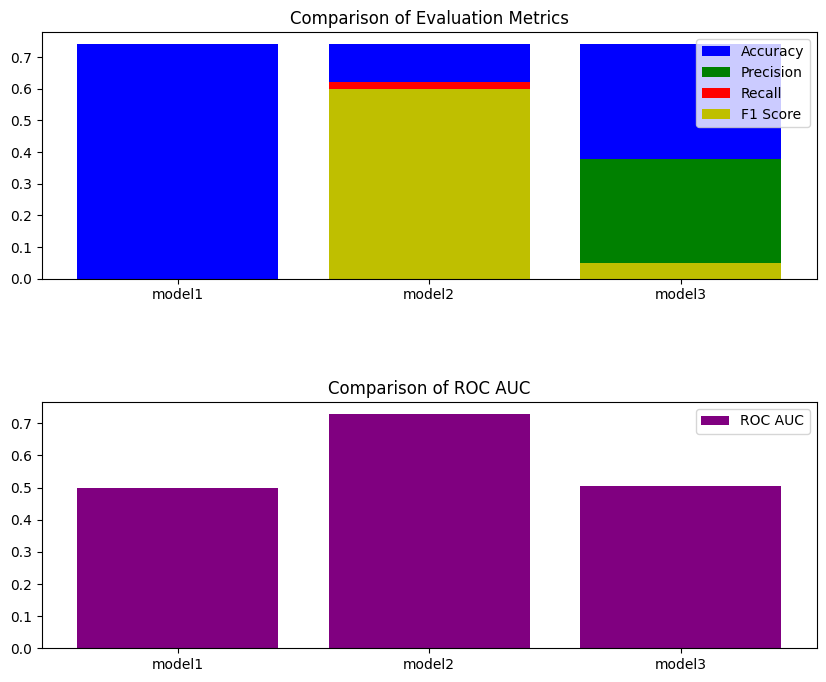

In [59]:
# Model names
models = ['model1', 'model2', 'model3']

# Evaluation scores for each model
accuracy = [0.74, 0.74, 0.741]
precision = [0.00, 0.58, 0.378]
recall = [0.00, 0.62, 0.027]
f1 = [0.00, 0.60, 0.051]
roc_auc = [0.50, 0.73, 0.506]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

# Bar plots for accuracy, precision, recall, F1 Score
axes[0].bar(models, accuracy, color='b', label='Accuracy')
axes[0].bar(models, precision, color='g', label='Precision')
axes[0].bar(models, recall, color='r', label='Recall')
axes[0].bar(models, f1, color='y', label='F1 Score')
axes[0].set_title('Comparison of Evaluation Metrics')
axes[0].legend()

# Bar plot for ROC AUC
axes[1].bar(models, roc_auc, color='purple', label='ROC AUC')
axes[1].set_title('Comparison of ROC AUC')
axes[1].legend()

# Show the plots
plt.show()

In [61]:
joblib.dump(model2, 'decision_tree_model.pkl')

['decision_tree_model.pkl']